# Association Rule for Movies dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

# Read Data into dataframe

In [2]:
movies = pd.read_csv("C:/Users/Swathi/Desktop/Excelr Classes/Assignments/8.Association Rules/my_movies.csv")
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


#  Data Analysis

In [3]:
# Data in my_movies provided here represnts same set data represnted in list as well as tabular format 
# we can use either numerical(dummy_vales) or list

In [4]:
# Lets perform Exploratory Data Analysis (EDA) on list (char values)

movies_a = movies.drop(movies.columns[5:16], axis=1)
movies_a.fillna('null',inplace=True)
movies_a

,V1,V2,V3,V4,V5
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2
1,Gladiator,Patriot,Braveheart,null,null
2,LOTR1,LOTR2,null,null,null
3,Gladiator,Patriot,Sixth Sense,null,null
4,Gladiator,Patriot,Sixth Sense,null,null
5,Gladiator,Patriot,Sixth Sense,null,null
6,Harry Potter1,Harry Potter2,null,null,null
7,Gladiator,Patriot,null,null,null
8,Gladiator,Patriot,Sixth Sense,null,null
9,Sixth Sense,LOTR,Gladiator,Green Mile,null


In [5]:
# Converting dataframe into list for more data exploration
movies_list = movies_a.to_numpy().tolist()
movies_list

[['Sixth Sense', 'LOTR1', 'Harry Potter1', 'Green Mile', 'LOTR2'],
 ['Gladiator', 'Patriot', 'Braveheart', 'null', 'null'],
 ['LOTR1', 'LOTR2', 'null', 'null', 'null'],
 ['Gladiator', 'Patriot', 'Sixth Sense', 'null', 'null'],
 ['Gladiator', 'Patriot', 'Sixth Sense', 'null', 'null'],
 ['Gladiator', 'Patriot', 'Sixth Sense', 'null', 'null'],
 ['Harry Potter1', 'Harry Potter2', 'null', 'null', 'null'],
 ['Gladiator', 'Patriot', 'null', 'null', 'null'],
 ['Gladiator', 'Patriot', 'Sixth Sense', 'null', 'null'],
 ['Sixth Sense', 'LOTR', 'Gladiator', 'Green Mile', 'null']]

In [6]:
#Remove noise from the data i.e. in this case 'nan'

j=len(movies_list)
i=0
while i < j:
    while 'null' in movies_list[i]:
        movies_list[i].remove('null')
    i+=1

In [7]:
movies_list

[['Sixth Sense', 'LOTR1', 'Harry Potter1', 'Green Mile', 'LOTR2'],
 ['Gladiator', 'Patriot', 'Braveheart'],
 ['LOTR1', 'LOTR2'],
 ['Gladiator', 'Patriot', 'Sixth Sense'],
 ['Gladiator', 'Patriot', 'Sixth Sense'],
 ['Gladiator', 'Patriot', 'Sixth Sense'],
 ['Harry Potter1', 'Harry Potter2'],
 ['Gladiator', 'Patriot'],
 ['Gladiator', 'Patriot', 'Sixth Sense'],
 ['Sixth Sense', 'LOTR', 'Gladiator', 'Green Mile']]

In [8]:
#store all the indivisual products in one single list []

all_movies_list = [movie for transaction in movies_list for movie in transaction]
print(all_movies_list)
len(all_movies_list)

['Sixth Sense', 'LOTR1', 'Harry Potter1', 'Green Mile', 'LOTR2', 'Gladiator', 'Patriot', 'Braveheart', 'LOTR1', 'LOTR2', 'Gladiator', 'Patriot', 'Sixth Sense', 'Gladiator', 'Patriot', 'Sixth Sense', 'Gladiator', 'Patriot', 'Sixth Sense', 'Harry Potter1', 'Harry Potter2', 'Gladiator', 'Patriot', 'Gladiator', 'Patriot', 'Sixth Sense', 'Sixth Sense', 'LOTR', 'Gladiator', 'Green Mile']


30

In [9]:
# Identify movies and thier frequeny

from collections import Counter
from collections import OrderedDict

movie_frequency=Counter(all_movies_list)
print("Raw Data   :\n",movie_frequency)

movie_frequency=sorted(movie_frequency.items(), key = lambda x:x[1]) 
print("\nSorted Data:\n",movie_frequency)

#Split Items(products) and its frequency
frequencies = list(reversed([i[1] for i in movie_frequency]))
movies = list(reversed([i[0] for i in movie_frequency]))

print("\n Movie List:",movies)
print("\n Movie Frequency",frequencies)


Raw Data   :
 Counter({'Gladiator': 7, 'Sixth Sense': 6, 'Patriot': 6, 'LOTR1': 2, 'Harry Potter1': 2, 'Green Mile': 2, 'LOTR2': 2, 'Braveheart': 1, 'Harry Potter2': 1, 'LOTR': 1})

Sorted Data:
 [('Braveheart', 1), ('Harry Potter2', 1), ('LOTR', 1), ('LOTR1', 2), ('Harry Potter1', 2), ('Green Mile', 2), ('LOTR2', 2), ('Sixth Sense', 6), ('Patriot', 6), ('Gladiator', 7)]

 Movie List: ['Gladiator', 'Patriot', 'Sixth Sense', 'LOTR2', 'Green Mile', 'Harry Potter1', 'LOTR1', 'LOTR', 'Harry Potter2', 'Braveheart']

 Movie Frequency [7, 6, 6, 2, 2, 2, 2, 1, 1, 1]


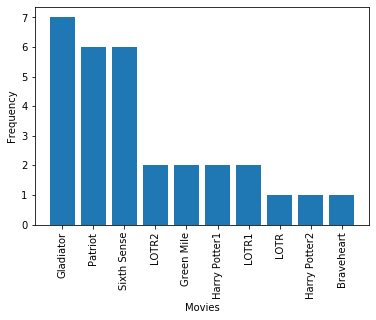

In [10]:
# Visualize the movie with its frequency 

import matplotlib.pyplot as plt

plt.bar (movies,frequencies)
plt.xticks(rotation = 90)
plt.xlabel("Movies")
plt.ylabel("Frequency")
plt.show()

In [11]:
# Creating Data Frame for the movie data 
# Purpose of converting all list into Series object Coz to treat each list element as entire element not as separate 

movie_series  = pd.DataFrame(pd.Series(movies_list))
movie_series.columns = ["Movie_Series"]
print(movie_series)

                                        Movie_Series
0  [Sixth Sense, LOTR1, Harry Potter1, Green Mile...
1                   [Gladiator, Patriot, Braveheart]
2                                     [LOTR1, LOTR2]
3                  [Gladiator, Patriot, Sixth Sense]
4                  [Gladiator, Patriot, Sixth Sense]
5                  [Gladiator, Patriot, Sixth Sense]
6                     [Harry Potter1, Harry Potter2]
7                               [Gladiator, Patriot]
8                  [Gladiator, Patriot, Sixth Sense]
9         [Sixth Sense, LOTR, Gladiator, Green Mile]


In [12]:
X = movie_series['Movie_Series'].str.join(sep='*')
# now each transaction is like:  fruit*yogurt*cream cheese *meat spreads
# print(X)

# create dummy variable for each 
X= X.str.get_dummies(sep='*')
X

,Braveheart,Gladiator,Green Mile,Harry Potter1,Harry Potter2,LOTR,LOTR1,LOTR2,Patriot,Sixth Sense
0,0,0,1,1,0,0,1,1,0,1
1,1,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,1,0,0
3,0,1,0,0,0,0,0,0,1,1
4,0,1,0,0,0,0,0,0,1,1
5,0,1,0,0,0,0,0,0,1,1
6,0,0,0,1,1,0,0,0,0,0
7,0,1,0,0,0,0,0,0,1,0
8,0,1,0,0,0,0,0,0,1,1
9,0,1,1,0,0,1,0,0,0,1


# after apply dummy concept we arrive at the same values which were dropped initially from the dataframe 'movies_a'

In [13]:
# Perform Association rule mining

frequent_movies = apriori(X, min_support=0.005, max_len=3,use_colnames = True)
print("Raw Data:\n",frequent_movies.head())

# Most Frequent item sets based on support in decending order
frequent_movies.sort_values('support',ascending = False,inplace=True)
print("\nSorted as per Support value:\n",frequent_movies.head())



Raw Data:
    support         itemsets
0      0.1     (Braveheart)
1      0.7      (Gladiator)
2      0.2     (Green Mile)
3      0.2  (Harry Potter1)
4      0.1  (Harry Potter2)

Sorted as per Support value:
     support                  itemsets
1       0.7               (Gladiator)
14      0.6      (Gladiator, Patriot)
8       0.6                 (Patriot)
9       0.6             (Sixth Sense)
15      0.5  (Gladiator, Sixth Sense)


In [14]:
rules = association_rules(frequent_movies, metric="lift", min_threshold=1)
rules.sort_values('lift',ascending = False,inplace=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
16,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
21,(LOTR),"(Gladiator, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
90,(LOTR2),"(Sixth Sense, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
85,(Harry Potter1),"(Sixth Sense, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
84,(LOTR1),"(Sixth Sense, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
...,...,...,...,...,...,...,...,...,...
8,(Sixth Sense),"(Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
5,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
10,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
28,"(Gladiator, Sixth Sense)",(Green Mile),0.5,0.2,0.1,0.200000,1.000000,0.00,1.0


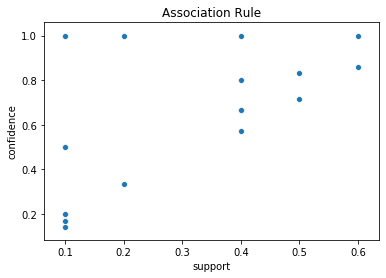

In [15]:
sns.scatterplot(x=rules['support'],y=rules['confidence'], data=rules)
plt.title("Association Rule")
plt.show()

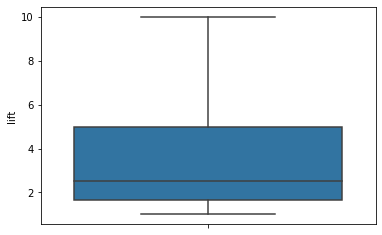

In [16]:
# Box plot to visuzlize lift
sns.boxplot(rules['lift'], data=rules,orient='v')
plt.show()

# ii. with different values of support, confidence & length in Apriori

In [17]:
Y = movie_series['Movie_Series'].str.join(sep='*')
# now each transaction is like:  fruit*yogurt*cream cheese *meat spreads
# print(X)

# create dummy variable for each 
Y= Y.str.get_dummies(sep='*')
Y

,Braveheart,Gladiator,Green Mile,Harry Potter1,Harry Potter2,LOTR,LOTR1,LOTR2,Patriot,Sixth Sense
0,0,0,1,1,0,0,1,1,0,1
1,1,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,1,0,0
3,0,1,0,0,0,0,0,0,1,1
4,0,1,0,0,0,0,0,0,1,1
5,0,1,0,0,0,0,0,0,1,1
6,0,0,0,1,1,0,0,0,0,0
7,0,1,0,0,0,0,0,0,1,0
8,0,1,0,0,0,0,0,0,1,1
9,0,1,1,0,0,1,0,0,0,1


In [18]:
# Perform Association rule mining for min_support=0.003 & length = None

frequent_movies1 = apriori(Y, min_support=0.003, max_len=2,use_colnames = True)
print("Raw Data:\n",frequent_movies1.head())

# Most Frequent item sets based on support in decending order
frequent_movies1.sort_values('support',ascending = False,inplace=True)
print("\nSorted as per Support value:\n",frequent_movies1.head())



Raw Data:
    support         itemsets
0      0.1     (Braveheart)
1      0.7      (Gladiator)
2      0.2     (Green Mile)
3      0.2  (Harry Potter1)
4      0.1  (Harry Potter2)

Sorted as per Support value:
     support                  itemsets
1       0.7               (Gladiator)
8       0.6                 (Patriot)
14      0.6      (Gladiator, Patriot)
9       0.6             (Sixth Sense)
15      0.5  (Gladiator, Sixth Sense)


In [19]:
rules1 = association_rules(frequent_movies1, metric="lift", min_threshold=1)
rules1.sort_values('lift',ascending = False,inplace=True)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
16,(Harry Potter2),(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
17,(Harry Potter1),(Harry Potter2),0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
23,(LOTR),(Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
22,(Green Mile),(LOTR),0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
13,(Harry Potter1),(LOTR2),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60
20,(Green Mile),(LOTR2),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60
19,(LOTR1),(Green Mile),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60
18,(Green Mile),(LOTR1),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60


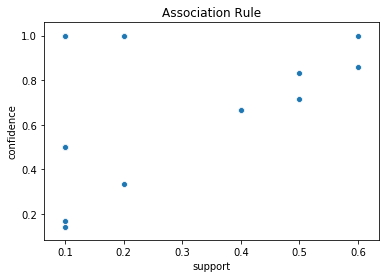

In [20]:
sns.scatterplot(x=rules1['support'],y=rules1['confidence'], data=rules1)
plt.title("Association Rule")
plt.show()

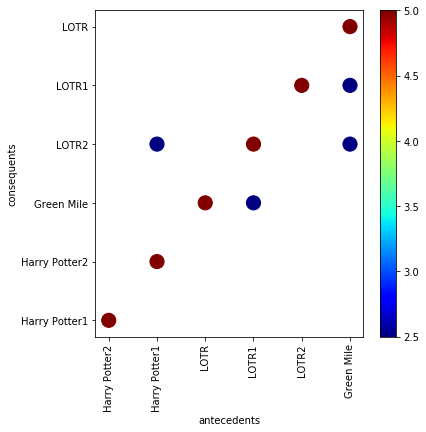

In [21]:
A1 = rules1.antecedents.iloc[0:10]
B1 = rules1.consequents.iloc[0:10]
C1 = rules1.lift.iloc[0:10]

# abovecode give frozen set error so change A & B:

A1 = A1.apply(lambda x: list(x)[0]).astype("unicode")
B1 = B1.apply(lambda x: list(x)[0]).astype("unicode")

# plot figure against lift for top 10 'lift' value
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc1 = plt.scatter(A1,B1, s = 200, c=C1, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()